In [1]:
#A decision tree is a simple representation for classifying examples. 
#Decision trees are predictive models that use a set of binary rules to calculate a target value.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Load the CSV file into Python for analysis
df=pd.read_csv(r"C:\Users\HP\Python-Class-Advanced\Assignment11\heart_decision.csv")
#Check the first 5 records
print(df.head(5))

   sex  chol  restecg  target
0    1   233        0       1
1    1   250        1       1
2    0   204        0       1
3    1   236        1       1
4    0   354        1       1


In [3]:
#Obtain the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sex      50 non-null     int64
 1   chol     50 non-null     int64
 2   restecg  50 non-null     int64
 3   target   50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [4]:
#describe the data set
df.describe()

,sex,chol,restecg,target
count,50.000000,50.000000,50.000000,50.000000
mean,0.740000,246.660000,0.460000,0.400000
std,0.443087,47.310787,0.503457,0.494872
min,0.000000,167.000000,0.000000,0.000000
25%,0.250000,216.750000,0.000000,0.000000
50%,1.000000,239.000000,0.000000,0.000000
75%,1.000000,275.750000,1.000000,1.000000
max,1.000000,354.000000,1.000000,1.000000


In [5]:
#Obtain the shape of the dataset
df.shape

(50, 4)

In [6]:
#Select the features of the dataset
#split dataset in features 
features=df.drop(columns=["target"])
print(features.head())

   sex  chol  restecg
0    1   233        0
1    1   250        1
2    0   204        0
3    1   236        1
4    0   354        1


In [7]:
#Select the target
#split dataset in target variable
target = df.target
print(target.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease vs No Disease')

<function matplotlib.pyplot.show(close=None, block=None)>

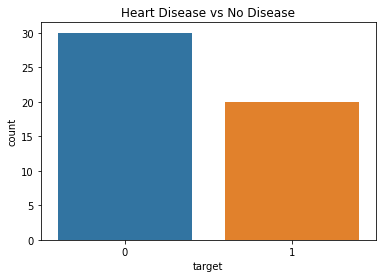

In [8]:
#create a countplot of the target
target_count=sns.countplot(x=target, data=df)
target_count.set_title("Heart Disease vs No Disease")
plt.show

(array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

<function matplotlib.pyplot.show(close=None, block=None)>

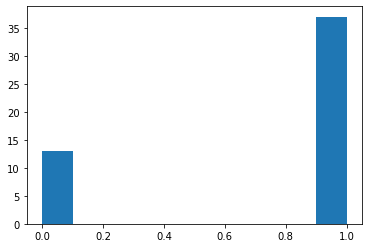

In [9]:
#A graaph of the features - sex
plt.hist(df.sex)
plt.show

(array([ 5.,  5.,  4., 12.,  6.,  6.,  6.,  1.,  2.,  3.]),
 array([167. , 185.7, 204.4, 223.1, 241.8, 260.5, 279.2, 297.9, 316.6,
        335.3, 354. ]),
 <BarContainer object of 10 artists>)

<function matplotlib.pyplot.show(close=None, block=None)>

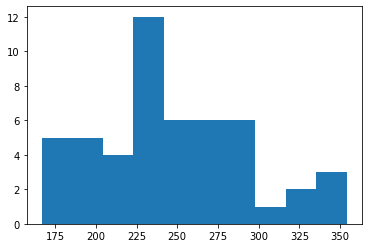

In [10]:
#A grph of features - chol
plt.hist (df.chol)
plt.show

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

<function matplotlib.pyplot.show(close=None, block=None)>

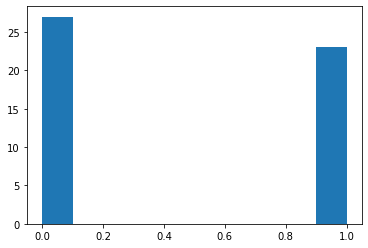

In [11]:
#A graphof features - restecg
plt.hist(df.restecg)
plt.show

In [12]:
#create a decision tree classifier model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaledfeatures = sc.fit_transform(features) # scale our features

In [13]:
#Fit your model
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
features_train, features_test,target_train,target_test = train_test_split(scaledfeatures,target)

In [14]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
model = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=0)

In [15]:
# predict with your model
predictions = model.predict(features_test)
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [36]:
# Model Accuracy, how often is the classifier correct?
#import sklearn.metrics
#print("Accuracy:", metrics.accuracy_score(target_test, predictions))

In [16]:
# confusion matrix using pd.crosstab
predictions = model.predict(features_test)
predictions.shape

pd.crosstab(target_test, predictions,rownames = ['Actual'],colnames = ['Predicted'])

(13,)

Predicted,0,1
Actual,,
0,5,3
1,2,3


In [17]:
from sklearn.metrics import classification_report
# Test Accuracy // Print a classification report of the data
print('\n ****** Classification Report *** \n\n')
print(classification_report(target_test, predictions))


 ****** Classification Report *** 


              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.50      0.60      0.55         5

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13



In [21]:
# plot tree
from sklearn import tree
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
# conda install pydotplus
# Create DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=features.columns,  
                                class_names='target')

True

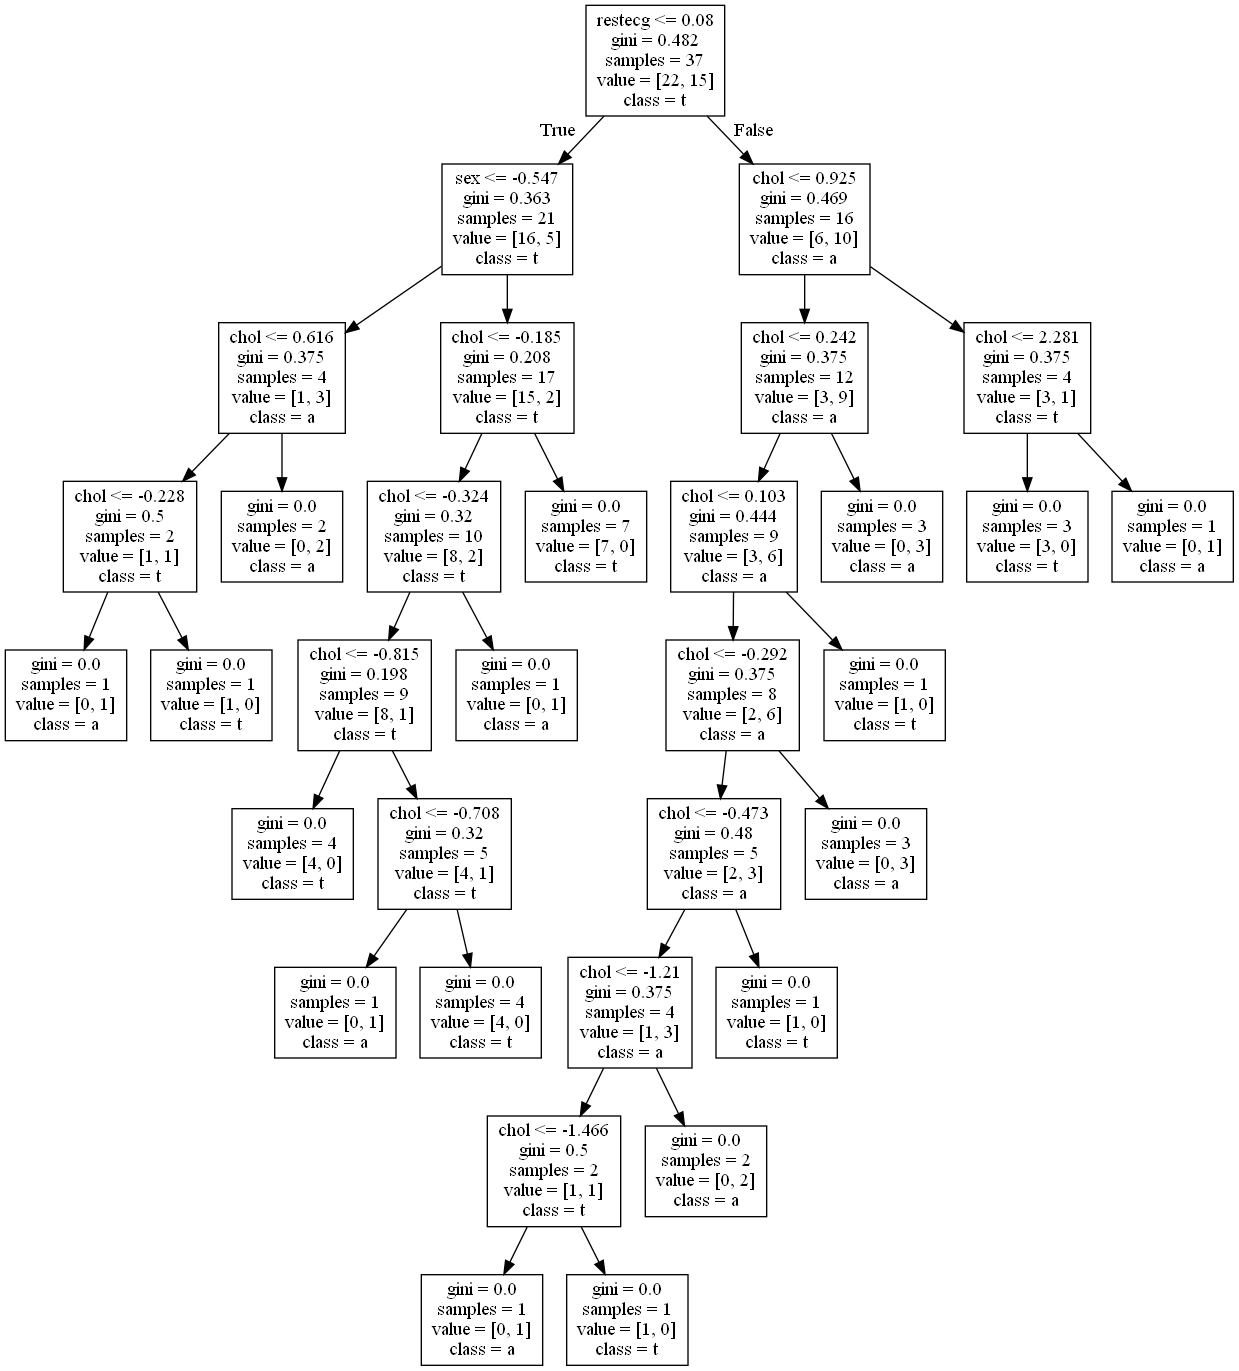

In [22]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('Heart_Condition.png')
Image(graph.create_png())


#Gini index or Gini impurity measures the degree or probability of 
#a particular variable being wrongly classified when it is randomly chosen. 
#A Gini Index of 0.5 denotes equally distributed elements into some classes.

#Value is how the samples to test for information gain are split up. 
#So at the root node, 32561 samples are divided into 24720 and 7841 samples each.

In [22]:
#Supervised learning (SL) is the machine learning task of learning a function that maps an input to an output based on 
#example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

#Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster 
#unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention.

#The main distinction between the two approaches is the use of labeled datasets. 
#To put it simply, supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not. ... 
#Unsupervised learning models, in contrast, work on their own to discover the inherent structure of unlabeled data



In [23]:
#Advantages of Decision Trees
#-Decision trees are easy to interpret and visualize.
#-It can easily capture Non-linear patterns.
#-It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
#-It can be used for feature engineering such as predicting missing values, suitable for variable selection.
#-The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

In [29]:
#Write the statement to selects all columns for row 2?
myarr = np.array([[ 0, 1, 2, 3],
               [ 4, 5, 6, 7],
               [ 8, 9, 10, 11]])

myarr[1,0]
myarr[1,1]
myarr[1,2]
myarr[1,3]

4

5

6

7

In [30]:
myarr[1, 0:3]
#returns elements in array from row index 1 which is row 2 and data from columns starting index 0 and 
#move through over next 3 elements in succession

array([4, 5, 6])

In [31]:
#What statement would you use to print the value counts for the dataframe df and the column target?
value_count=df.target.sum()
print(value_count)

20


In [ ]:
#Data preprocessing is the process of transforming raw data into a useful, understandable format. 
#Real-world or raw data usually has inconsistent formatting, human errors, and can also be incomplete. 
#Data preprocessing resolves such issues and makes datasets more complete and efficient to perform data analysis.

#Four general preprocessing steps
# - Data cleaning - Data cleaning refers to techniques to ‘clean’ data by removing outliers, replacing missing values, 
#smoothing noisy data, and correcting inconsistent data.
# - Data integration - Because data is being collected from multiple sources, data integration has become a vital part 
#of data preprocessing that involves data consolidation, data propagation and data virtualization
# - Data reduction - The purpose of data reduction is to have a condensed representation of the data set that is smaller 
#in volume, while maintaining the integrity of the original data set. This results in efficient, yet similar, results.
# - Data transformation - The final step of data preprocessing is transforming the data into a form appropriate for 
#data modeling.


In [ ]:
#Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
#The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred 
#from the data features. A tree can be seen as a piecewise constant approximation.

In [ ]:
#Without scaling the predictive algorithms tends to weigh greater values higher &
#consider smaller values as the lower values, regardless of the unit of the values.   -True

In [ ]:
#Most sklearn algorithms expect the data to have a Gaussian distribution. - True

In [ ]:
#Standardization transforms the data to have zero mean and a variance of 1, 
#thus the data in unitless.  - True

In [ ]:
#Normalization restricts data to a specific range. - True 
#This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

In [ ]:
#The sklearn StandardScaler uses the transforms the x values to their corresponding ____________.

In [ ]:
#List the three scaling formulas from the notes. A brief description is fine.


In [ ]:
#For binary classification, the model’s ability to recall the positive class, is known as sensitivity

In [ ]:
#State the recall for your model for the value one?    1.00

In [ ]:
#For binary classification, the model’s ability to recall the negative class, is known as specificity

In [ ]:
#State the specificity for you model?     0.62

In [ ]:
#The f1 score is a measure of performance of the model’s classification ability, State the f1 score for this model 
#(in the f1 column on the accuracy row)?  0.85

In [ ]:
#Looking at the model we can see that people who have the disease can be
#predicted well, because there is a precision of 0.75 and a recall of 1.00.

In [ ]:
#Looking at the model we can see that people who have do not have the
#disease can be predicted well, because there is a precision of 1.00 and a recall of 0.71.